<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/main/06-Con/Nb-06-con-feat-lvl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving Concrete Compressive Strength.csv to Concrete Compressive Strength.csv


In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [ ]:
df = pd.read_csv('Concrete Compressive Strength.csv')

In [ ]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [ ]:
# 1️⃣ Install required packages
!pip install xgboost shap --quiet

# 2️⃣ Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

# 3️⃣ Prepare data
X = df.drop('Concrete compressive strength ', axis=1)
y = df['Concrete compressive strength ']

# 4️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5️⃣ XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)




XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

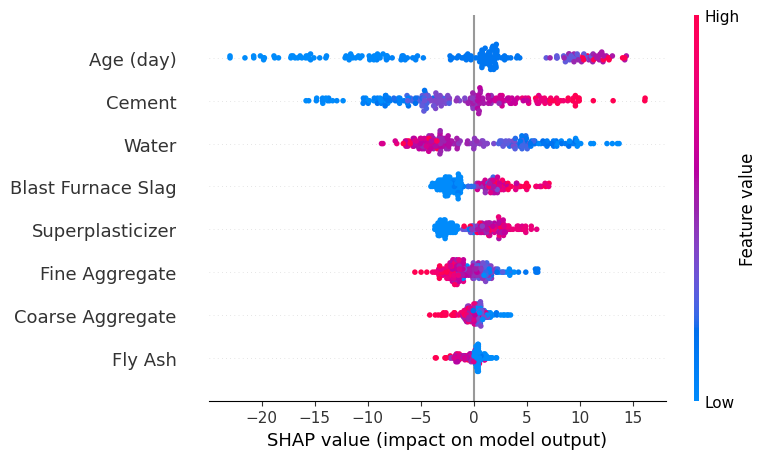

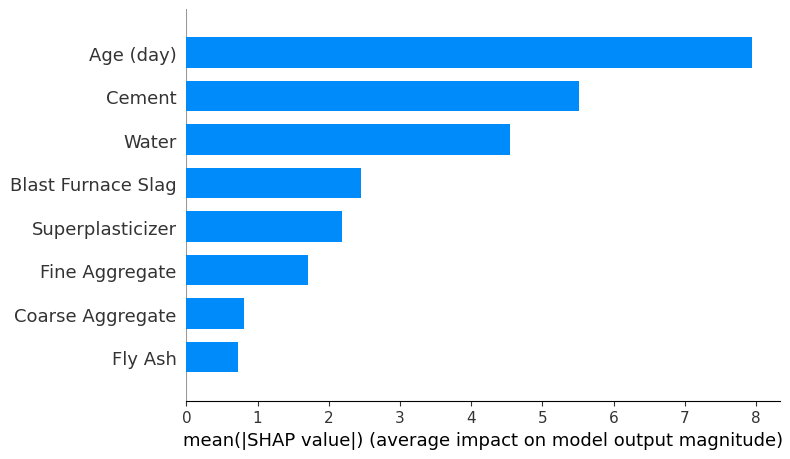

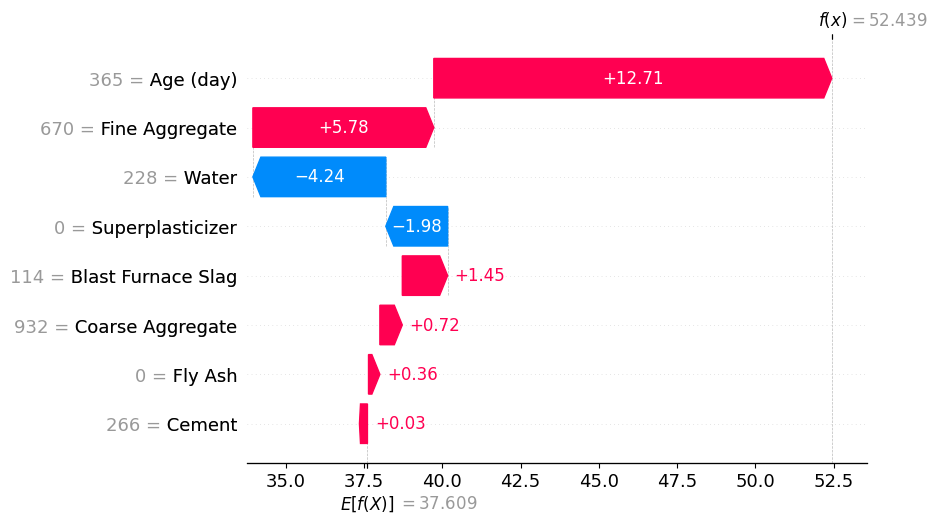

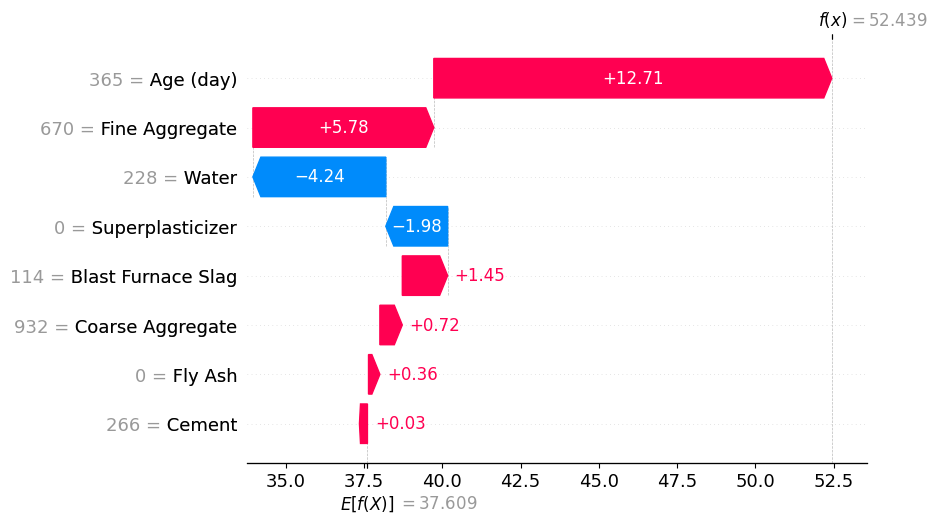

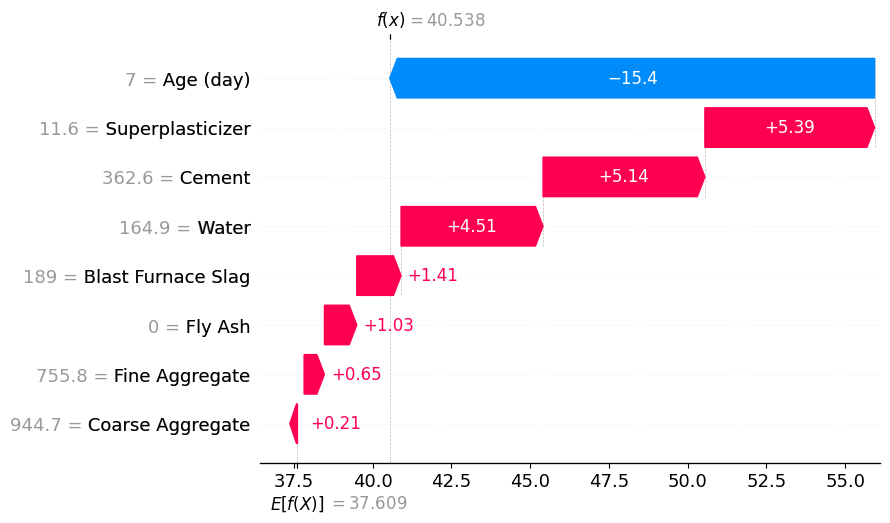

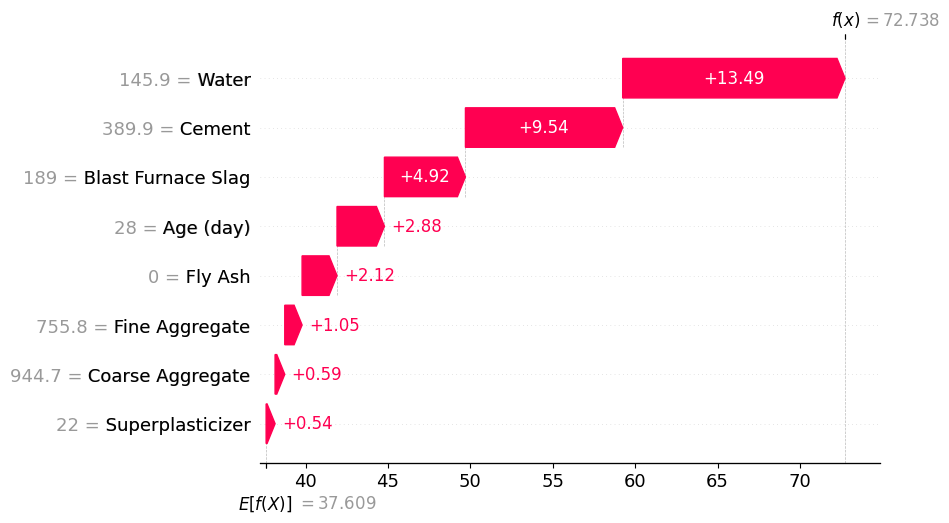

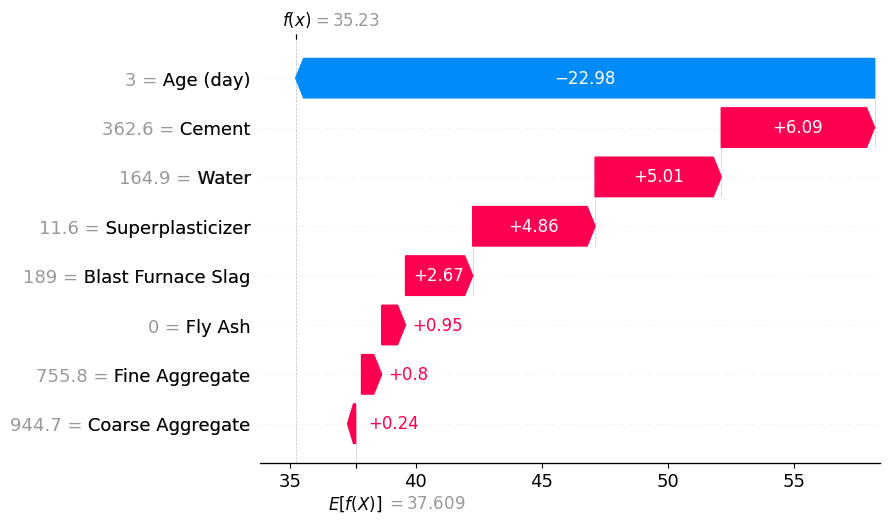

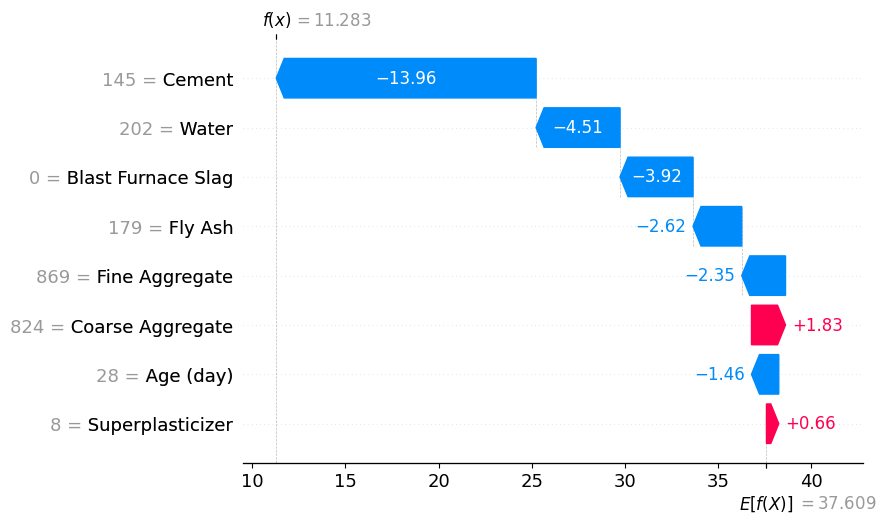

In [ ]:
# 6️⃣ Predict on test set
test_pred = model.predict(X_test)

# 7️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)  # use training set as background
shap_values_test = explainer(X_test)

# 8️⃣ Create DataFrame for SHAP values
shap_df_test = pd.DataFrame(shap_values_test.values, columns=X_test.columns)
shap_df_test['base_value'] = shap_values_test.base_values
shap_df_test['predicted_value'] = test_pred
shap_df_test['actual_value'] = y_test.values

# Save SHAP values to CSV
shap_df_test.to_csv("shap_values_test.csv", index=False)

# 9️⃣ Visualization

# a) Summary plot (feature impact across all test samples)
shap.summary_plot(shap_values_test, X_test)

# b) Bar plot (average absolute impact of features)
shap.summary_plot(shap_values_test, X_test, plot_type="bar")

# c) Waterfall plot (for a single sample, e.g., first sample)
shap.plots.waterfall(shap_values_test[0])

# d) Optional: generate waterfall plots for multiple samples
for i in range(5):  # first 5 samples
    shap.plots.waterfall(shap_values_test[i])

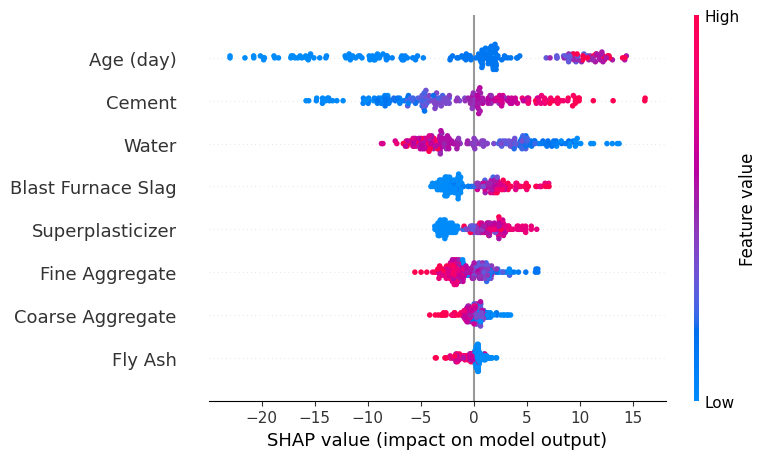

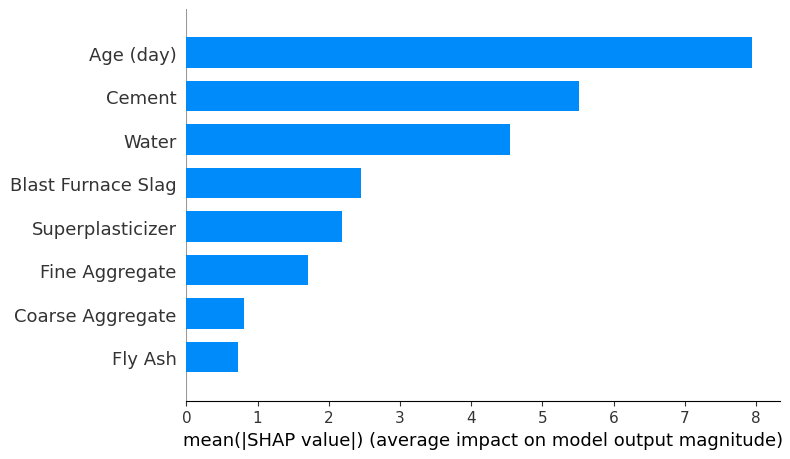

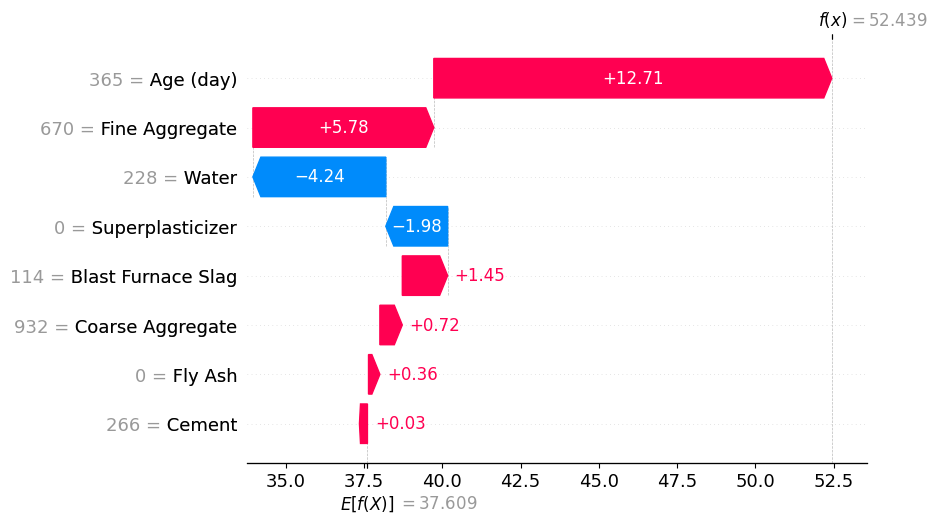

Feature contributions for sample 0
Cement: Feature Value = 266.0, SHAP Value = 0.03407573064425378
Blast Furnace Slag: Feature Value = 114.0, SHAP Value = 1.4481836807999935
Fly Ash: Feature Value = 0.0, SHAP Value = 0.36272961296170253
Water: Feature Value = 228.0, SHAP Value = -4.24498741873249
Superplasticizer: Feature Value = 0.0, SHAP Value = -1.9752789081419906
Coarse Aggregate: Feature Value = 932.0, SHAP Value = 0.7166002695891075
Fine Aggregate: Feature Value = 670.0, SHAP Value = 5.777851753883006
Age (day): Feature Value = 365.0, SHAP Value = 12.710666775796254
Base value (expected prediction): 37.60900747681529
Model prediction: 52.43887
Actual value: 52.90831981


In [ ]:
# 6️⃣ Predict on test set
y_pred = model.predict(X_test)

# 7️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)  # background dataset
shap_values = explainer(X_test)

# 8️⃣ Summary plot (global feature impact)
shap.summary_plot(shap_values, X_test)

# 9️⃣ Bar plot (average absolute contribution of features)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 10️⃣ Waterfall plot for a single sample (first sample)
shap.plots.waterfall(shap_values[0])

# 11️⃣ Access SHAP values for individual sample
# Example: first sample
sample_index = 0
sample_shap_values = shap_values.values[sample_index]
sample_features = X_test.iloc[sample_index]

print("Feature contributions for sample", sample_index)
for feature, value, shap_val in zip(X_test.columns, sample_features, sample_shap_values):
    print(f"{feature}: Feature Value = {value}, SHAP Value = {shap_val}")

print("Base value (expected prediction):", shap_values.base_values[sample_index])
print("Model prediction:", y_pred[sample_index])
print("Actual value:", y_test.values[sample_index])

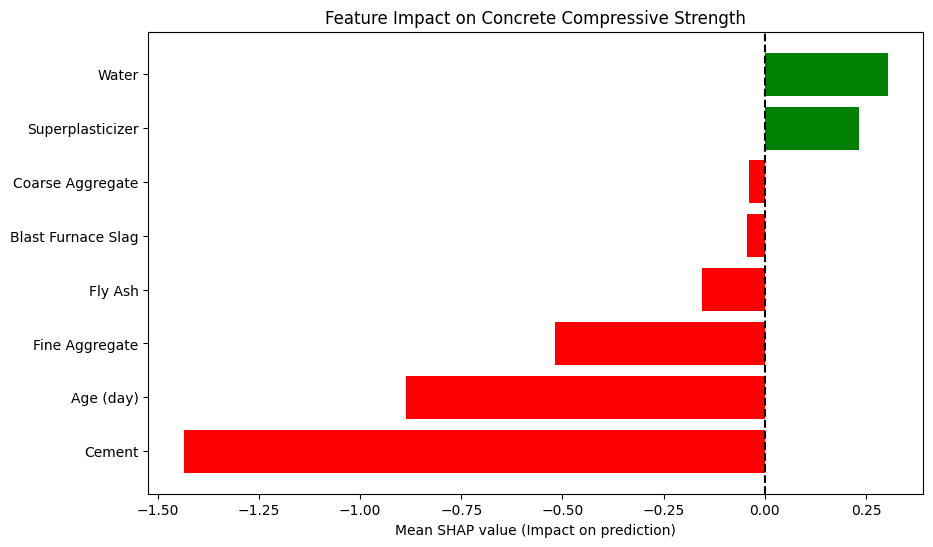

In [ ]:
# 6️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 7️⃣ Convert to DataFrame for easier plotting
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Compute mean SHAP value per feature (positive or negative impact)
mean_shap = shap_df.mean().sort_values()

# 8️⃣ Horizontal bar plot to show positive/negative impact clearly
plt.figure(figsize=(10,6))
colors = ['red' if val < 0 else 'green' for val in mean_shap]
plt.barh(mean_shap.index, mean_shap.values, color=colors)
plt.xlabel("Mean SHAP value (Impact on prediction)")
plt.title("Feature Impact on Concrete Compressive Strength")
plt.axvline(0, color='black', linestyle='--')  # zero line for reference
plt.show()